In [1]:
import pandas as pd
import numpy as np
import math
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
random.seed(15)

seaborn.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv('Exasens.csv') 
data

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         399 non-null    object 
 1   ID                399 non-null    object 
 2   Imagery_part_min  100 non-null    float64
 3   Imagery_part_avg  100 non-null    float64
 4   Real_part_min     100 non-null    float64
 5   Real_part_avg     100 non-null    float64
 6   Gender            399 non-null    int64  
 7   Age               399 non-null    int64  
 8   Smoking           399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB


In [4]:
data['Imagery_part_min'].fillna(data['Imagery_part_min'].median(), inplace = True)
data['Imagery_part_avg'].fillna(data['Imagery_part_avg'].median(), inplace = True)
data['Real_part_min'].fillna(data['Real_part_min'].median(), inplace = True)
data['Real_part_avg'].fillna(data['Real_part_avg'].median(), inplace = True)

In [5]:
data.isnull().sum()

Diagnosis           0
ID                  0
Imagery_part_min    0
Imagery_part_avg    0
Real_part_min       0
Real_part_avg       0
Gender              0
Age                 0
Smoking             0
dtype: int64

In [6]:
korelasi = data.corr()
korelasi

,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
Imagery_part_min,1.000000,0.979969,0.428429,0.441340,0.040204,0.081181,-0.032614
Imagery_part_avg,0.979969,1.000000,0.361730,0.445996,0.061558,0.091264,-0.032274
Real_part_min,0.428429,0.361730,1.000000,0.868340,-0.067549,0.006128,0.021302
Real_part_avg,0.441340,0.445996,0.868340,1.000000,-0.009185,0.014999,0.036029
Gender,0.040204,0.061558,-0.067549,-0.009185,1.000000,0.230465,0.072074
Age,0.081181,0.091264,0.006128,0.014999,0.230465,1.000000,0.135352
Smoking,-0.032614,-0.032274,0.021302,0.036029,0.072074,0.135352,1.000000


In [7]:
X = data.drop(['Diagnosis','ID','Imagery_part_min','Real_part_min','Gender','Age','Smoking'], axis=1)
X

,Imagery_part_avg,Real_part_avg
0,-300.563531,-464.171991
1,-314.750360,-469.263140
2,-317.436056,-471.897667
3,-317.399670,-468.856388
4,-316.155785,-472.869783
...,...,...
394,-314.327176,-467.136002
395,-314.327176,-467.136002
396,-314.327176,-467.136002
397,-314.327176,-467.136002


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Imagery_part_avg  399 non-null    float64
 1   Real_part_avg     399 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [9]:
print("Jumlah baris = {}".format(X.shape[0]))
print("Jumlah kolom = {}".format(X.shape[1]))

Jumlah baris = 399
Jumlah kolom = 2


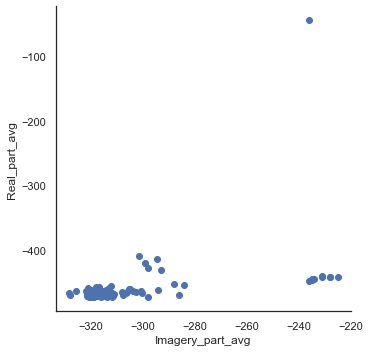

In [10]:
seaborn.FacetGrid(X,height=5) \
   .map(plt.scatter, 'Imagery_part_avg','Real_part_avg') \
   .add_legend()

In [11]:
cluster_awal = []
jumlah_kluster = 2
n = []
for i in range (jumlah_kluster):
    cek = False
    rnd = round(random.uniform(0,399))
    for j in n:
      if j == rnd:
        cek = True
        i -= 1
    if cek != True:
      n.append(rnd)
      y = [X.iloc[n[i],0],X.iloc[n[i],1]]
      cluster_awal.append(y)
    
print (cluster_awal)

[[-314.32717649999995, -467.13600245], [-318.6775535, -469.0241943]]


In [12]:
def jarakeuclidean(dtx, dty):
    result = 0
    for i in range(len(dtx)):
        result += math.sqrt(pow((dtx[i]-dty[i]),2))
    return result

In [13]:
def Getdata(df,i):
    get=[X.iloc[i,0],X.iloc[i,1]]
    return get

Clusterke = [[],[],[],[]]
hasilCluster = [[],[],[],[]]
for i in range(len(X)):
  dt = Getdata(X,i)
  print("Centroid :", dt)
  print("Data ke : ",i)
  nilaimin =jarakeuclidean(dt,cluster_awal[0])
  kluster = 0
  print("Cluster ke 0 :", jarakeuclidean(dt,cluster_awal[0]))
  for j in range(1,jumlah_kluster):
    print("Cluster ke ",j,": ", jarakeuclidean(dt,cluster_awal[j]))
    if(jarakeuclidean(dt,cluster_awal[j]) < nilaimin):
      nilaimin = jarakeuclidean(dt,cluster_awal[0])
      kluster = j
  print("Data ke :", i, "masuk pada cluster", kluster,"\n")
  print("=================================================\n")
  Clusterke[kluster].append(i)
  hasilCluster[kluster].append(dt)

Centroid : [-300.5635307, -464.1719907]
Data ke :  0
Cluster ke 0 : 16.727657549999947
Cluster ke  1 :  22.966226399999982
Data ke : 0 masuk pada cluster 0 


Centroid : [-314.7503595, -469.2631404]
Data ke :  1
Cluster ke 0 : 2.5503209500000708
Cluster ke  1 :  4.166140100000007
Data ke : 1 masuk pada cluster 0 


Centroid : [-317.43605560000003, -471.89766669999995]
Data ke :  2
Cluster ke 0 : 7.870543350000048
Cluster ke  1 :  4.114970299999925
Data ke : 2 masuk pada cluster 1 


Centroid : [-317.3996698, -468.856388]
Data ke :  3
Cluster ke 0 : 4.792878850000079
Cluster ke  1 :  1.4456899999999564
Data ke : 3 masuk pada cluster 1 


Centroid : [-316.1557853, -472.8697828]
Data ke :  4
Cluster ke 0 : 7.562389150000058
Cluster ke  1 :  6.367356700000016
Data ke : 4 masuk pada cluster 1 


Centroid : [-318.6775535, -469.0241943]
Data ke :  5
Cluster ke 0 : 6.238568850000036
Cluster ke  1 :  0.0
Data ke : 5 masuk pada cluster 1 


Centroid : [-320.6174777, -467.36185379999995]
Data ke 

Centroid : [-320.0732383, -463.0258699]
Data ke :  150
Cluster ke 0 : 9.856194350000067
Cluster ke  1 :  7.394009200000028
Data ke : 150 masuk pada cluster 1 


Centroid : [-321.92224869999995, -464.4679806]
Data ke :  151
Cluster ke 0 : 10.263094050000007
Cluster ke  1 :  7.800908899999968
Data ke : 151 masuk pada cluster 1 


Centroid : [-318.79220699999996, -473.7268171]
Data ke :  152
Cluster ke 0 : 11.055845150000039
Cluster ke  1 :  4.817276300000003
Data ke : 152 masuk pada cluster 1 


Centroid : [-328.28098539999996, -466.98096680000003]
Data ke :  153
Cluster ke 0 : 14.108844549999958
Cluster ke  1 :  11.646659399999919
Data ke : 153 masuk pada cluster 1 


Centroid : [-312.11609300000003, -456.3999337]
Data ke :  154
Cluster ke 0 : 12.947152249999874
Cluster ke  1 :  19.18572109999991
Data ke : 154 masuk pada cluster 0 


Centroid : [-318.896038, -467.43335279999997]
Data ke :  155
Cluster ke 0 : 4.866211850000013
Cluster ke  1 :  1.8093259999999987
Data ke : 155 masuk pada 

Data ke : 326 masuk pada cluster 0 


Centroid : [-314.32717649999995, -467.13600245]
Data ke :  327
Cluster ke 0 : 0.0
Cluster ke  1 :  6.238568850000036
Data ke : 327 masuk pada cluster 0 


Centroid : [-314.32717649999995, -467.13600245]
Data ke :  328
Cluster ke 0 : 0.0
Cluster ke  1 :  6.238568850000036
Data ke : 328 masuk pada cluster 0 


Centroid : [-314.32717649999995, -467.13600245]
Data ke :  329
Cluster ke 0 : 0.0
Cluster ke  1 :  6.238568850000036
Data ke : 329 masuk pada cluster 0 


Centroid : [-314.32717649999995, -467.13600245]
Data ke :  330
Cluster ke 0 : 0.0
Cluster ke  1 :  6.238568850000036
Data ke : 330 masuk pada cluster 0 


Centroid : [-314.32717649999995, -467.13600245]
Data ke :  331
Cluster ke 0 : 0.0
Cluster ke  1 :  6.238568850000036
Data ke : 331 masuk pada cluster 0 


Centroid : [-314.32717649999995, -467.13600245]
Data ke :  332
Cluster ke 0 : 0.0
Cluster ke  1 :  6.238568850000036
Data ke : 332 masuk pada cluster 0 


Centroid : [-314.32717649999995,

In [14]:
def average(nilai):
    result = []
    for j in range(len(nilai[0])): 
        jumlah = 0
        for i in range(len(nilai)): 
            jumlah += nilai[i][j] 
        result.append(jumlah/(len(nilai))) 
    return result 

In [15]:
for z in range (10): 
    Clusterke = [[],[],[],[]] 
    hasilCluster = [[],[],[],[]]
    for i in range(len(X)):
        dt = Getdata(X, i)
        nilaimin = jarakeuclidean(dt,cluster_awal[0]) 
        kluster = 0 
        for j in range(1,jumlah_kluster):
            if (jarakeuclidean(dt,cluster_awal[j]) < nilaimin): 
                nilaimin = jarakeuclidean(dt,cluster_awal[j]) 
                kluster = j 
        Clusterke[kluster].append(i) 
        hasilCluster[kluster].append(dt) 
    for i in range(0,jumlah_kluster):
        cluster_awal[i] = average(hasilCluster[i])

Text(0.5, 1.0, 'K-Means')

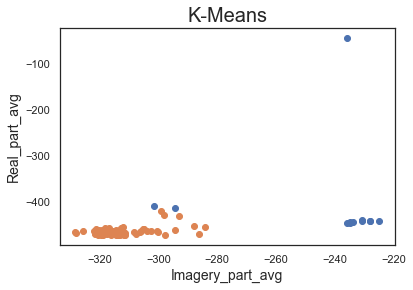

In [16]:
for i in range(jumlah_kluster):
  x1 = [hasilCluster[i][j][0] for j in range(len(Clusterke[i]))]
  x2 = [hasilCluster[i][j][1] for j in range(len(Clusterke[i]))]
  plt.plot(x1,x2,'o')
plt.xlabel("Imagery_part_avg",fontsize = 14)
plt.ylabel("Real_part_avg", fontsize = 14)
plt.title("K-Means", fontsize=20)